# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key
# List of city data
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
record=1
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]

# Loop through all the cities in our list
for city in cities:
    response = requests.get(f"{url}&q={city}")
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response.raise_for_status()
        response_json=response.json()
      
        city_name.append(response_json["name"])
       
        # Append the City information into city_data list
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        max_temp.append(response_json["main"]["temp_max"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        wind_speed.append(response_json["wind"]["speed"])
        print(f"Processing Record {record} | {response_json['name']}")
        # Add 1 to the record count
        record=record+1
    except requests.exceptions.HTTPError as e:
        print(f"City not found. Skipping")
    #continue
    

Processing Record 1 | Barrow
Processing Record 2 | Si Racha
Processing Record 3 | Ostrovnoy
Processing Record 4 | Ust-Maya
Processing Record 5 | Dikson
Processing Record 6 | Mount Gambier
Processing Record 7 | Rikitea
Processing Record 8 | Hobart
Processing Record 9 | San Policarpo
Processing Record 10 | Ginir
Processing Record 11 | Clyde River
Processing Record 12 | Khatanga
Processing Record 13 | Tasiilaq
Processing Record 14 | Hermanus
Processing Record 15 | Mataura
Processing Record 16 | Mecca
Processing Record 17 | Puerto Carreno
Processing Record 18 | Saint-Philippe
City not found. Skipping
Processing Record 19 | Punta Arenas
Processing Record 20 | Georgetown
Processing Record 21 | Pevek
City not found. Skipping
Processing Record 22 | Hasaki
Processing Record 23 | Busselton
Processing Record 24 | Yulara
Processing Record 25 | Victoria
Processing Record 26 | Saldanha
City not found. Skipping
Processing Record 27 | Vaini
Processing Record 28 | Ushuaia
Processing Record 29 | Poum
Pr

Processing Record 232 | Mitu
Processing Record 233 | Llallagua
Processing Record 234 | Yaan
Processing Record 235 | Kungsbacka
Processing Record 236 | Nova Prata
Processing Record 237 | Acapulco
Processing Record 238 | Zhigansk
City not found. Skipping
Processing Record 239 | Kayerkan
Processing Record 240 | Chuy
City not found. Skipping
Processing Record 241 | Hargeysa
Processing Record 242 | Ucluelet
Processing Record 243 | Kars
Processing Record 244 | Touros
Processing Record 245 | Fortuna
Processing Record 246 | Sisimiut
Processing Record 247 | Caravelas
Processing Record 248 | Portmore
Processing Record 249 | Dickinson
Processing Record 250 | Gornopravdinsk
Processing Record 251 | Sena Madureira
Processing Record 252 | Ereymentau
Processing Record 253 | Cayenne
Processing Record 254 | Khash
Processing Record 255 | Vostok
Processing Record 256 | Bubaque
Processing Record 257 | Egvekinot
Processing Record 258 | Itajuipe
City not found. Skipping
Processing Record 259 | Antsohihy
Proc

Processing Record 460 | Wendo
Processing Record 461 | Bonavista
Processing Record 462 | Sangar
Processing Record 463 | Port Hardy
City not found. Skipping
Processing Record 464 | Cabo San Lucas
Processing Record 465 | Nkayi
Processing Record 466 | Gazli
Processing Record 467 | Koumra
Processing Record 468 | Sovetskiy
Processing Record 469 | Kokkarion
Processing Record 470 | Kutum
Processing Record 471 | Roald
Processing Record 472 | Mayor Pablo Lagerenza
Processing Record 473 | Kiruna
Processing Record 474 | Yantzaza
Processing Record 475 | Rawson
Processing Record 476 | Port Hedland
Processing Record 477 | Necochea
City not found. Skipping
Processing Record 478 | Kailua
Processing Record 479 | Dingle
Processing Record 480 | Bud
Processing Record 481 | Coreau
Processing Record 482 | Zhenhai
Processing Record 483 | Huarmey
Processing Record 484 | Kununurra
Processing Record 485 | Iralaya
Processing Record 486 | Baghdad
City not found. Skipping
Processing Record 487 | Baruun-Urt
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#put all the data inside a Dictionary
weather_dict={"City":city_name,
               "Cloudiness":cloudiness,
                "Country":country,
                 "Date":date,
                  "Humidity":humidity,
                   "Lat":lat,
                    "Lng":lng,
                     "Max Temp":max_temp,
                      "Wind Speed":wind_speed}
# Convert array of JSONs into Pandas DataFrame
weather_data=pd.DataFrame(weather_dict)
# Show Record Count
weather_data.count()


City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [5]:
# Export the City_Data into a csv
weather_data.to_csv("output_data_file")
# Display the City Data Frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,93,AR,1561606570,38,-38.31,-60.23,283.00,9.28
1,Si Racha,20,TH,1561606570,62,13.17,100.93,305.37,4.60
2,Ostrovnoy,100,RU,1561606570,78,68.05,39.51,283.90,5.56
3,Ust-Maya,0,RU,1561606570,34,60.42,134.54,297.60,2.48
4,Dikson,85,RU,1561606571,93,73.51,80.55,274.30,7.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

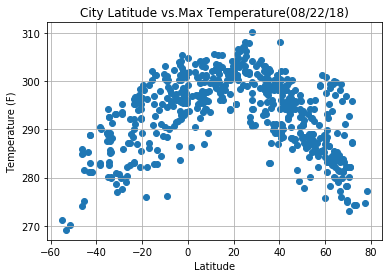

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs.Max Temperature(08/22/18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("City Latitude vs.Max Temperature.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

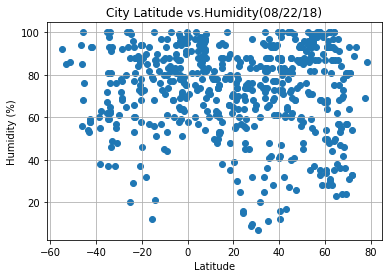

In [7]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs.Humidity(08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("City Latitude vs.Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

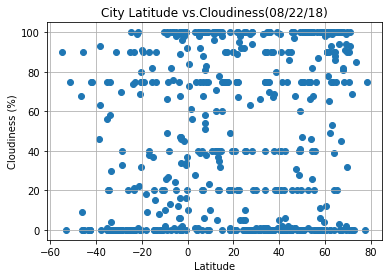

In [8]:
# Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs.Cloudiness(08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("City Latitude vs.Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

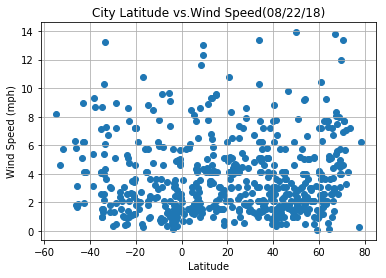

In [9]:
# Build the scatter plots for latitude vs. wind speed plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs.Wind Speed(08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("City Latitude vs.Wind Speed.png")
# Show plot
plt.show()

Observation:
    1.Latitude is the distance of the location of the Earth from the equator.The further away from the equator that you are the less sunlight that this location receives.We can conclude our observation by analyzing the"City Latitude vs.Max Temperature" curve,temp is more near the equator and gradually decrease when it's away from it.(One observation Temp value is showing crazy in the plot more than 300F in Y axix,my thought it might receiving wrong data from the weather API)
    2.The relative humidity is higher at polar regions than at 30o latitude,while the specific humidity is higher at 30o than at polar region.
    3.Cloudiness and Wind speed is difficult to predict as all the datas are scatter through out the region.